# Welcome to The Notebook (NLP Customer Satisfaction Analysis using Python NLTK)
---

In this guided-project we are going to cover the following tasks: 

- Task 1: Loading the customer reviews dataset
- Task 2: Clean and preprocess the reviews
- Task 3: Tokenize the reviews and removing the stop words
- Task 4: Exploring the tokens and product categories
- Task 5: Extracting the adjectives in the reviews
- Task 6: Finding the sentiment of each review 


Importing the modules

In [51]:
import pandas as pd 
import string 

# Importing Natural Language Processing toolkit 
import nltk

# Downloading the NLTK english stop words
nltk.download('stopwords')

# Downloading the NLTK sentence tokenizer
nltk.download('punkt')

# Downloading the NLTK POS Tagger
nltk.download('averaged_perceptron_tagger')

# Downloading the NLTK Vader Lexicon
nltk.download('vader_lexicon')

# Importing the NLTK english stop words 
from nltk.corpus import stopwords

# Importing frequency distribution from NLTK
from nltk.probability import FreqDist

# Importing VADER dictionary. It is a rule-based sentiment analyzer
from nltk.sentiment import SentimentIntensityAnalyzer

# Importing data visualization modules 
from wordcloud import WordCloud
import plotly.express as px 
import matplotlib.pyplot as plt

print("Modules are imported! :)")

Modules are imported! :)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Task 1

### Loading the customer reviews dataset
---

In [52]:
data = pd.read_csv("C:/Users/Administrator/Documents/Project NLP/NLP Customer Satisfaction Analysis using Python NLTK/dataset.csv")
data

,product_review,product_category
0,"I love, love, love this jumpsuit. it's fun, fl...",Bottoms
1,Beautifully made pants and on trend with the f...,Bottoms
2,I never would have given these pants a second ...,Bottoms
3,These pants are even better in person. the onl...,Bottoms
4,The silhouette and length of this skirt and le...,Bottoms
...,...,...
3371,This is a nice everyday jacket to wear with dr...,Jackets
3372,Almost perfect! this jacket doesn't have that ...,Jackets
3373,I really like the soft and very wearability of...,Jackets
3374,I need to remember that this brand runs small....,Jackets


Let's check the shape of the data frame

In [53]:
data.shape

(3376, 2)

Let's check the first `product_review`

In [54]:
data.product_review[0]

"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"

Checking the number of reviews per product category

In [55]:
data.product_category.value_counts()

product_category
Bottoms     685
Dresses     681
Tops        680
Jackets     680
Intimate    650
Name: count, dtype: int64

## Task 2 

### Clean and preprocess the reviews

- Lower casing
- Removing the punctuations

---

In [56]:
data.head()

,product_review,product_category
0,"I love, love, love this jumpsuit. it's fun, fl...",Bottoms
1,Beautifully made pants and on trend with the f...,Bottoms
2,I never would have given these pants a second ...,Bottoms
3,These pants are even better in person. the onl...,Bottoms
4,The silhouette and length of this skirt and le...,Bottoms


Converting all the reveiews to lower case

In [57]:
#convert the product_review column first row to lower case
data.product_review[0].lower()

"i love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"

In [58]:
#convert the product_review column to lower case
data.product_review = data.product_review.str.lower()
data.head()

,product_review,product_category
0,"i love, love, love this jumpsuit. it's fun, fl...",Bottoms
1,beautifully made pants and on trend with the f...,Bottoms
2,i never would have given these pants a second ...,Bottoms
3,these pants are even better in person. the onl...,Bottoms
4,the silhouette and length of this skirt and le...,Bottoms


Removing the punctuations

In [59]:
#Removing the punctuations form the first cell in the product_review column
data.product_review[0].translate(str.maketrans('','',string.punctuation))

'i love love love this jumpsuit its fun flirty and fabulous every time i wear it i get nothing but great compliments'

Let's remove the punctuations from all the reviews

In [60]:
data.product_review = data.product_review.str.translate(str.maketrans('','',string.punctuation))
data.head()

,product_review,product_category
0,i love love love this jumpsuit its fun flirty ...,Bottoms
1,beautifully made pants and on trend with the f...,Bottoms
2,i never would have given these pants a second ...,Bottoms
3,these pants are even better in person the only...,Bottoms
4,the silhouette and length of this skirt and le...,Bottoms


## Task 3 

### Tokenize the reviews and removing the stop words 
---
- <b>Tokenization</b> is the process of breaking down a continuous stream of text, such as a sentence or a paragraph, into smaller units called tokens. These tokens typically correspond to words, but can also represent subword units like prefixes, suffixes, and stems.

- <b>Tokenization</b> facilitates the transformation of text into a format that machine learning algorithms can understand.

In [61]:
tokens = nltk.word_tokenize(data.product_review[0])
tokens

['i',
 'love',
 'love',
 'love',
 'this',
 'jumpsuit',
 'its',
 'fun',
 'flirty',
 'and',
 'fabulous',
 'every',
 'time',
 'i',
 'wear',
 'it',
 'i',
 'get',
 'nothing',
 'but',
 'great',
 'compliments']

Let's remove the Stop Words
    
<b>Stop words</b> are common words (e.g., "the," "and," "is") that appear frequently in a language and have little semantic value. Removing them is essential in natural language processing tasks to reduce data size, speed up processing, and improve the accuracy of algorithms by focusing on more informative words that convey the actual meaning of a text.


In [62]:
english_stopwords = stopwords.words("English") #stopword in English
english_stopwords.extend(['is', 'its', 'yours', 'every', 'thing', 'cant', 'dont', 'doesnt']) #extend the stopwords in English with additionals
english_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Let's remove the stop words from the `tokens` list

In [63]:
clean_words = [word for word in tokens if word not in english_stopwords]
clean_words


['love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliments']

Let's tokenize all the reviews 

In [64]:
data['product_review_tokenized'] = data.product_review.apply(nltk.word_tokenize)
data

,product_review,product_category,product_review_tokenized
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun..."
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit..."
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a..."
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ..."
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt..."
...,...,...,...
3371,this is a nice everyday jacket to wear with dr...,Jackets,"[this, is, a, nice, everyday, jacket, to, wear..."
3372,almost perfect this jacket doesnt have that we...,Jackets,"[almost, perfect, this, jacket, doesnt, have, ..."
3373,i really like the soft and very wearability of...,Jackets,"[i, really, like, the, soft, and, very, wearab..."
3374,i need to remember that this brand runs small ...,Jackets,"[i, need, to, remember, that, this, brand, run..."


remove the stopwords from the tokenized reviews

In [65]:
def remove_stopwords(tokens):
    return [t for t in tokens if t not in english_stopwords]

data['clean_tokens'] = data.product_review_tokenized.apply(remove_stopwords)
data.head()


,product_review,product_category,product_review_tokenized,clean_tokens
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu..."
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop..."
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl..."
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ..."
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering..."


Let's recreate the reviews from the cleaned tokens again

In [66]:
data['product_review_cleaned'] = data.clean_tokens.apply(lambda x: " ".join(x))
data.head()

,product_review,product_category,product_review_tokenized,clean_tokens,product_review_cleaned
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ti...
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...


## Task 4

### Exploring the tokens and product categories

In [67]:
data.head()

,product_review,product_category,product_review_tokenized,clean_tokens,product_review_cleaned
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ti...
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...


Let's take a look at the product categories again

In [68]:
data.product_category.value_counts()

product_category
Bottoms     685
Dresses     681
Tops        680
Jackets     680
Intimate    650
Name: count, dtype: int64

Let's combine all the tokens used in reviews for the `Tops`

In [69]:
tops_tokens = []

for x in data[data.product_category == 'Tops'].clean_tokens:
    tops_tokens.extend(x)
len(tops_tokens)



18384

Let's find the 20 most common words in the `Tops` products' reviews 

In [70]:
freq_dist = FreqDist(tops_tokens)
freq_dist.most_common(20)

[('love', 337),
 ('top', 334),
 ('wear', 233),
 ('great', 229),
 ('size', 211),
 ('color', 185),
 ('shirt', 172),
 ('fit', 167),
 ('im', 149),
 ('perfect', 146),
 ('small', 141),
 ('like', 140),
 ('soft', 136),
 ('flattering', 128),
 ('little', 120),
 ('one', 119),
 ('sweater', 118),
 ('fits', 112),
 ('bought', 111),
 ('well', 109)]

Exercise: Find the 20 most common words in the `Dresses` products' reviews 

In [71]:
dresses_tokens = []

for x in data[data.product_category == 'Dresses'].clean_tokens:
    dresses_tokens.extend(x)

freq_dist_dresses = FreqDist(dresses_tokens)
freq_dist_dresses.most_common(20)

[('dress', 1062),
 ('like', 321),
 ('fabric', 254),
 ('would', 220),
 ('size', 207),
 ('fit', 207),
 ('back', 166),
 ('look', 157),
 ('really', 154),
 ('love', 152),
 ('im', 146),
 ('ordered', 146),
 ('material', 139),
 ('small', 128),
 ('looks', 119),
 ('looked', 118),
 ('much', 111),
 ('also', 106),
 ('top', 105),
 ('wear', 105)]

## Task 5

### Extracting the adjectives used in the reviews

In [72]:
data.head()

,product_review,product_category,product_review_tokenized,clean_tokens,product_review_cleaned
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ti...
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...


### Part of Speech Tagging


<b>Part of Speech:</b> The grammatical role of a word in a sentence. A part of speech is one of the nine types of English words: VERB, NOUN, ADJECTIVE, ADVERB, PRONOUN, PREPOSITION, DETERMINER, CONJUNCTION, INTERJECTION.

In [73]:
data.product_review[0]

'i love love love this jumpsuit its fun flirty and fabulous every time i wear it i get nothing but great compliments'

In [74]:
nltk.download('tagsets')
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [75]:
nltk.pos_tag(data.product_review_tokenized[0])

[('i', 'NN'),
 ('love', 'VBP'),
 ('love', 'NN'),
 ('love', 'NN'),
 ('this', 'DT'),
 ('jumpsuit', 'NN'),
 ('its', 'PRP$'),
 ('fun', 'NN'),
 ('flirty', 'NN'),
 ('and', 'CC'),
 ('fabulous', 'JJ'),
 ('every', 'DT'),
 ('time', 'NN'),
 ('i', 'NN'),
 ('wear', 'VBP'),
 ('it', 'PRP'),
 ('i', 'JJ'),
 ('get', 'VBP'),
 ('nothing', 'NN'),
 ('but', 'CC'),
 ('great', 'JJ'),
 ('compliments', 'NNS')]

Let's use the POS-tagger to assign part of speech to all the tokens of all of the reviews

In [76]:
data['POS_tokens'] = data.product_review_tokenized.apply(nltk.pos_tag)
data.head()

,product_review,product_category,product_review_tokenized,clean_tokens,product_review_cleaned,POS_tokens
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ti...,"[(i, NN), (love, VBP), (love, NN), (love, NN),..."
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...,"[(beautifully, RB), (made, VBN), (pants, NNS),..."
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...,"[(i, NN), (never, RB), (would, MD), (have, VB)..."
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...,"[(these, DT), (pants, NNS), (are, VBP), (even,..."
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...,"[(the, DT), (silhouette, NN), (and, CC), (leng..."


Let's extract the adjectives used in each review

Let's combine all the `adjectives` for the `Tops`.

In [77]:
def extract_adj(tokens):
    adjectives = []
    for x in tokens:
        if x[1] in ['JJ', 'JJR', 'JJS']:
            adjectives.append(x[0])
    return adjectives

data['adjectives'] = data.POS_tokens.apply(extract_adj)
data.head()

,product_review,product_category,product_review_tokenized,clean_tokens,product_review_cleaned,POS_tokens,adjectives
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ti...,"[(i, NN), (love, VBP), (love, NN), (love, NN),...","[fabulous, i, great]"
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...,"[(beautifully, RB), (made, VBN), (pants, NNS),...","[flared, much]"
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...,"[(i, NN), (never, RB), (would, MD), (have, VB)...","[second, much, cuter, right, small, loose, navy]"
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...,"[(these, DT), (pants, NNS), (are, VBP), (even,...","[only, dry]"
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...,"[(the, DT), (silhouette, NN), (and, CC), (leng...","[classic, comfortable, favorite, different, hi..."


Let's visualize the adjectives using a wordcloud

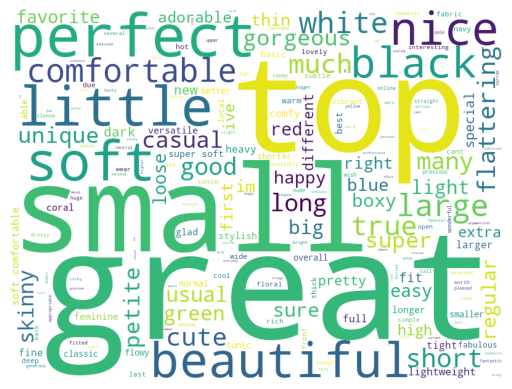

In [78]:
adj_tops = ""
for x in data[data.product_category == 'Tops'].adjectives:
    adj_tops += " ".join(x) + " "
    
word_cloud = WordCloud(width = 800, height = 600, background_color = 'white').generate(adj_tops)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

<b>Exercise</b>: Write a python method that gets a product category name and combine the adjectives used in the reviews related to the input category and visualize them using a word cloud.

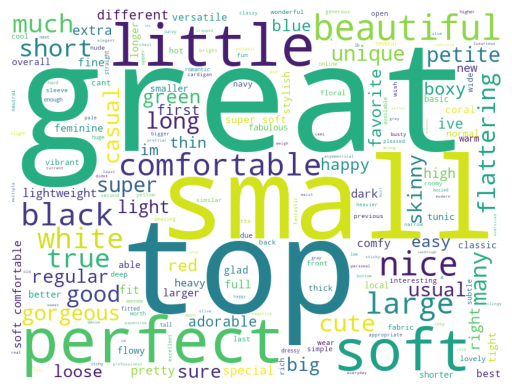

In [79]:
def visualize_adjectives(category):
    adjectives = ""
    
    for x in data[data.product_category == category].adjectives:
        adj_bottoms += " ".join(x) + " "
        
    word_cloud = WordCloud(width = 800, height = 600, background_color = 'white').generate(adj_tops)
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.show()

visualize_adjectives("dresses")

## Task 6 

### Finding the sentiment of each review 

In [80]:
data.head()

,product_review,product_category,product_review_tokenized,clean_tokens,product_review_cleaned,POS_tokens,adjectives
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ti...,"[(i, NN), (love, VBP), (love, NN), (love, NN),...","[fabulous, i, great]"
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...,"[(beautifully, RB), (made, VBN), (pants, NNS),...","[flared, much]"
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...,"[(i, NN), (never, RB), (would, MD), (have, VB)...","[second, much, cuter, right, small, loose, navy]"
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...,"[(these, DT), (pants, NNS), (are, VBP), (even,...","[only, dry]"
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...,"[(the, DT), (silhouette, NN), (and, CC), (leng...","[classic, comfortable, favorite, different, hi..."


Let's find the sentiment of the reviews

In [81]:
sent = SentimentIntensityAnalyzer()
review = data.product_review_cleaned[0]
print(review)

scores = sent.polarity_scores(review)
print(scores)

love love love jumpsuit fun flirty fabulous time wear get nothing great compliments
{'neg': 0.177, 'neu': 0.159, 'pos': 0.665, 'compound': 0.9464}


### Sentiment scores:

- `pos`: The probability of `positive` sentiment
- `neu`: The probability of `neutral` sentiment
- `neg`: The probability of `negative` sentiment
- `compound`: The normalized `compound` score that takes values from -1 to 1

We can use the `compound` score to find the sentiment of each review.

- if compound score>=0.05 then `positive` 
- if compound score between -0.05 and 0.05 then `neutral` 
- if compound score<=-0.05 then `negative` 


Now let's create a method to find the sentiment of a review using the compound score

In [82]:
def polarity_score(review):
    # Initilizing the Sentiment Analyzer
    sent = SentimentIntensityAnalyzer()
   
    # Extracting the sentiment polarity scores of a review
    scores = sent.polarity_scores(review)
    
    # Getting the compound score
    compound = scores['compound']
    
    if compound > 0.05:
        return "positive"
    elif compound < -0.5:
        return "negative"
    else:
        return "neutral"



Let's label all the reviews with sentiment

In [83]:
data['sentiment'] = data.product_review_cleaned.apply(polarity_score)
data.head()

,product_review,product_category,product_review_tokenized,clean_tokens,product_review_cleaned,POS_tokens,adjectives,sentiment
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ti...,"[(i, NN), (love, VBP), (love, NN), (love, NN),...","[fabulous, i, great]",positive
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...,"[(beautifully, RB), (made, VBN), (pants, NNS),...","[flared, much]",positive
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...,"[(i, NN), (never, RB), (would, MD), (have, VB)...","[second, much, cuter, right, small, loose, navy]",positive
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...,"[(these, DT), (pants, NNS), (are, VBP), (even,...","[only, dry]",positive
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...,"[(the, DT), (silhouette, NN), (and, CC), (leng...","[classic, comfortable, favorite, different, hi...",positive


In [84]:
df = data.groupby(['product_category', 'sentiment']).size().reset_index(name = 'counts')
df

,product_category,sentiment,counts
0,Bottoms,neutral,6
1,Bottoms,positive,679
2,Dresses,negative,35
3,Dresses,neutral,76
4,Dresses,positive,570
5,Intimate,negative,3
6,Intimate,neutral,33
7,Intimate,positive,614
8,Jackets,negative,2
9,Jackets,neutral,8


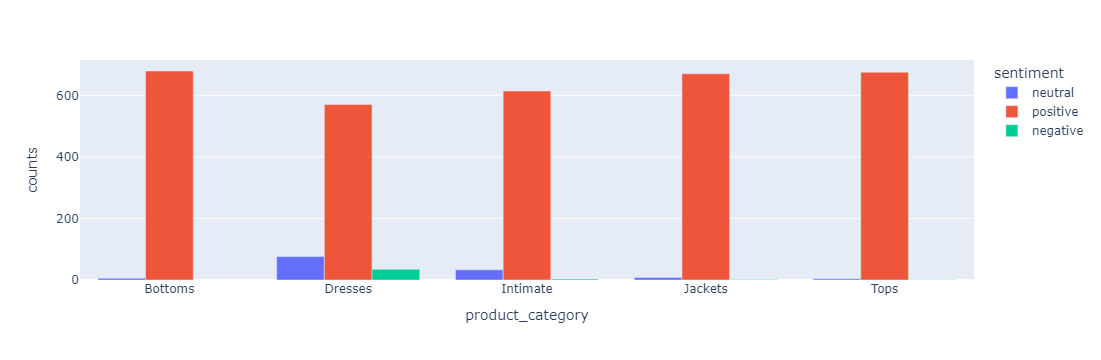

In [85]:
px.bar(df, x='product_category', y='counts', color = 'sentiment', barmode = 'group')